In [13]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


In [2]:
factory = PokemonFactory("pokemon.json")

In [9]:
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
pokemon_names = ["jolteon","caterpie","snorlax","onix","mewtwo"]

def create_pokemons(names=pokemon_names,status=StatusEffect.NONE, level=100, life=1):
    pokemons=[]
    for name in names:
        pokemons.append(factory.create(name, level, status, life))
    return pokemons

pokemons= create_pokemons()

# Ejercicio 1

### Item a

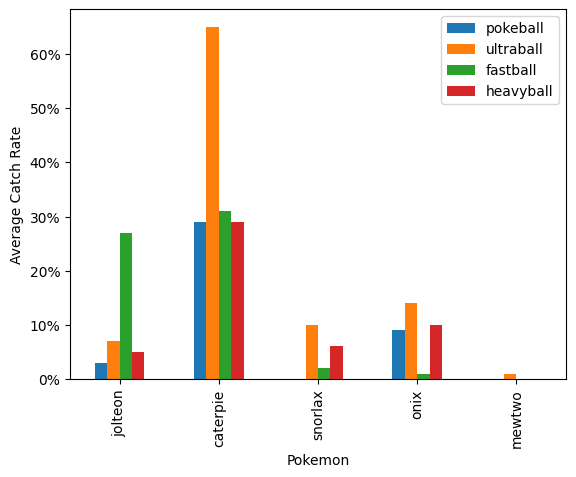

In [10]:
pokemons = create_pokemons()

def pokemon_stats():
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            results = []
            for _ in range(100):             
                results.append(attempt_catch(pokemon, pokeball)[0])
            average = sum(results) / len(results)*100
            data[pokeball].append(average)

    df = pd.DataFrame(data, index=pokemon_names)
    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

    ax = df.plot(kind='bar')
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('Average Catch Rate')
    plt.xlabel('Pokemon')
    plt.show()

pokemon_stats()

### Item B

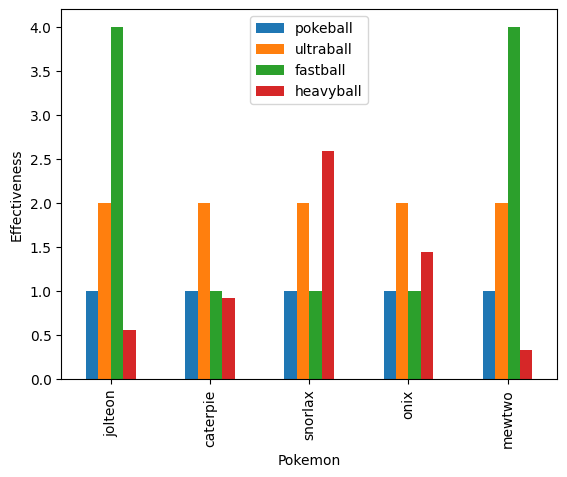

In [11]:
def pokeball_effectiveness():
    base_pokeball = "pokeball"
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            base_pokeball_catch_rate = attempt_catch(pokemon, base_pokeball)[1]
            catch_rate = attempt_catch(pokemon, pokeball)[1]
            effectiveness = catch_rate / base_pokeball_catch_rate
            data[pokeball].append(effectiveness)
    
    df = pd.DataFrame(data, index=pokemon_names)

    df.plot(kind='bar')
    plt.ylabel('Effectiveness')
    plt.xlabel('Pokemon')
    plt.show()    
   

pokeball_effectiveness()

## Ejercicio 2

### Item A

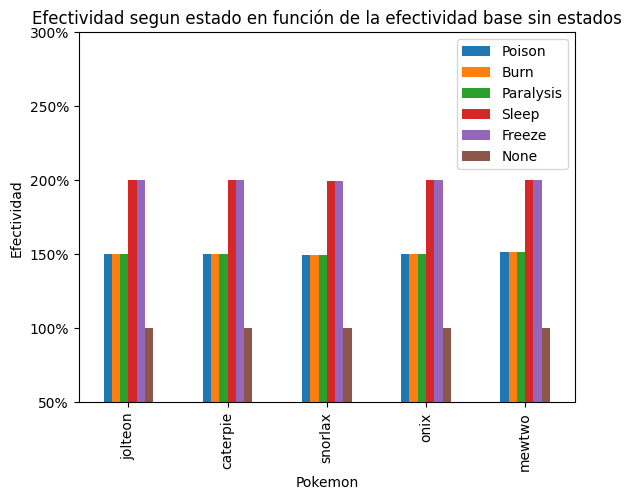

In [12]:
data = {status.name.capitalize(): [] for status in StatusEffect}
for status in StatusEffect:
    pokemons = create_pokemons(status=status)
    base_pokemons = create_pokemons()
    for index, pokemon in enumerate(pokemons):
        base_catch_rate = attempt_catch(base_pokemons[index], "pokeball")[1]
        catch_rate = attempt_catch(pokemon, "pokeball")[1]
        catch_rate = (catch_rate / base_catch_rate) * 100
        data[status.name.capitalize()].append(catch_rate)
    
df = pd.DataFrame(data, index=pokemon_names)
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

ax = df.plot(kind='bar')
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Efectividad')
plt.xlabel('Pokemon')
plt.ylim(50, 300)
plt.title("Efectividad segun estado en función de la efectividad base sin estados")
plt.show()    

### Item B

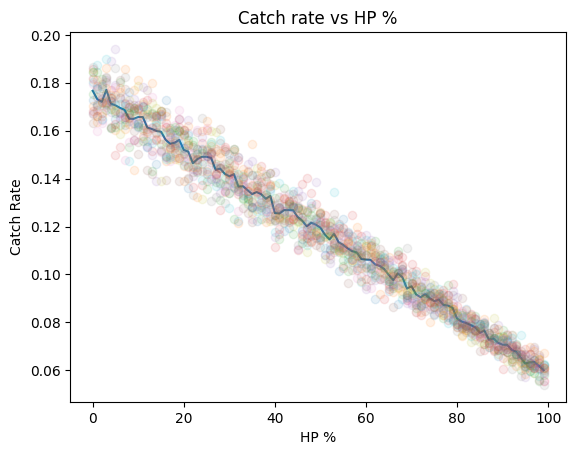

In [23]:
catch_rate_noise = []
catch_rate_noise_avg = []
life_values = range(0,100)
for life in life_values:
    pokemon = factory.create("onix", 100, StatusEffect.NONE, life/100)
    aux=[]
    for _ in range(15):
        aux.append(attempt_catch(pokemon, "pokeball", 0.05)[1])
    catch_rate_noise.append(aux)
    catch_rate_noise_avg.append(np.average(aux))

plt.plot(life_values, catch_rate_noise_avg)
plt.plot(life_values, catch_rate_noise, 'o', alpha=0.1)

plt.ylabel('Catch Rate')
plt.xlabel('HP %')
plt.title("Catch rate vs HP %")
plt.show()

### Item C


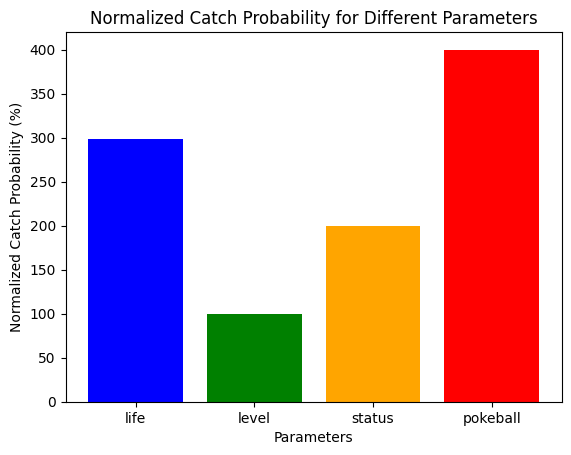

In [42]:
#vida, condición de salud, pokebola, nivel

# jolteon

life_values = [0,0.2,0.4,0.6,0.8,1]
level_values = [1,20,40,60,80,100]
status_values = [StatusEffect.NONE.name, StatusEffect.POISON.name, StatusEffect.SLEEP.name]
pokeball_values = ["pokeball", "ultraball", "fastball", "heavyball"]

param_names = ["life", "level", "status", "pokeball"]

base_case= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 1), "pokeball")[1]
min_life_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 0.01), "pokeball")[1]
normalized_min_life_attempt= min_life_attempt*100/base_case
min_level_attempt= attempt_catch(factory.create("jolteon", 1, StatusEffect.NONE, 1), "pokeball")[1]
normalized_min_level_attempt= min_level_attempt*100/base_case
sleep_status_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.SLEEP, 1), "pokeball")[1]
normalized_sleep_status_attempt= sleep_status_attempt*100/base_case
fastball_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 1), "fastball")[1]
normalized_fastball_attempt= fastball_attempt*100/base_case

normalized_values = [normalized_min_life_attempt, normalized_min_level_attempt, normalized_sleep_status_attempt, normalized_fastball_attempt]

# Create bar graph
plt.bar(param_names, normalized_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Parameters')
plt.ylabel('Normalized Catch Probability (%)')
plt.title('Normalized Catch Probability for Different Parameters')
plt.show()




### Item D

In [ ]:
#Analizarlo en un caso más realista

### Item E

In [ ]:
#Idem D pero considerando el nivel